# **The Boston Housing Price dataset**

Con esta base de datos, nuestro objetivo será el de predecir el precio promedio de casas de un suburbio de Boston de mediados de los 70's, de acuerdo a características tales como la tasa de crímines, impuestos, concentración de óxido nítrico, etcétera. Los precios de las casas van de los 10,000 a los 50,000 dólares.<br>
**Un problema de predicción consiste en obtener valores en una escala continua.**<br> Para entender este concepto, imaginemos que nos piden que cada uno de nosotros dé su predicción acerca de la temperatura actual. Algún compañero podría decir: 25°C, alguien más podría estimar que la temperatura es de 19.5°, otro hará una estimación de 22°C, etc. El punto es que las predicciones pueden tener cualquier valor, no nos estamos limitando a un rango o valor particular, puede ser un valor entero o un valor con decimales. Este comportamiento representa una caso de predicción de valores en una escala continua.<br>
 En el caso del problema del Boston Housing Price dataset, sólo se va a predecir un valor por cada casa, en este caso, el precio de cada casa en cuestión. En machine learning, la tarea de predecir valores en una escala continua se conoce como **regresión**.<br>
La base de datos Boston Housing Price se compone únicamente de 506 instancias, de las cuales, 404 corresponden al conjunto de entrenamiento y 102 al conjunto de prueba. Otra propiedad peculiar de esta base de datos, consiste en que los atributos de los datos de entrada están definidos en diferentes escalas. Por ejemplo, algunas características tienes valores entre 0 y 1, otras entre 1 y 12, otras entre 0 y 100, etcétera.<br>
Keras tiene precargada esta base de datos:


In [19]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [20]:
train_data.shape #El conjunto de entrenamiento se compone de 404 instancias y cada una de estas instancias, está constituida por 13 atributos o características

(404, 13)

In [21]:
test_data.shape #El conjunto de prueba se compone de 13 instancias y cada una de estas instancias, está constituida por 13 atributos o características

(102, 13)

Las 13 características o atributos de los datos de entrada, se enlistan a continuación: <br>

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

In [22]:
train_data[345] # Ejemplo de los parametros de una casa del conjunto de entrenamiento

array([  1.46336,   0.     ,  19.58   ,   0.     ,   0.605  ,   7.489  ,
        90.8    ,   1.9709 ,   5.     , 403.     ,  14.7    , 374.43   ,
         1.73   ])

In [23]:
test_data[87]  # Ejemplo de los parametros de una casa del conjunto de prueba

array([1.1069e-01, 0.0000e+00, 1.3890e+01, 1.0000e+00, 5.5000e-01,
       5.9510e+00, 9.3800e+01, 2.8893e+00, 5.0000e+00, 2.7600e+02,
       1.6400e+01, 3.9690e+02, 1.7920e+01])

In [24]:
len(train_data[100]) # Cada dato (casa) tiene 13 caracteristicas o atributos

13

In [25]:
len(test_data[87])  # Cada dato (casa) tiene 13 caracteristicas o atributos

13

Las etiquetas de la base de datos, consisten en precios promedios de casas, fijadas en miles de dólares.

In [26]:
train_targets[:2] #V¿ Valores correspondientes al precio de cada casa

array([15.2, 42.3])

# **Preprocesamiento de los datos**

Debido a que los atributos de los datos están expresados en distintas escalas, es conveniente estandarizar estos valores para facilitarle a la red neuronal el proceso de ajuste de los pesos. Para lograrlo, la estandarización se llevará a cabo por atributo, de tal forma que a cada columna de la matriz de entrada, se le restará su promedio y luego se le divirá entre la desviación estándar, generando así atributos centrados en cero y con desviación estándar de 1. 

In [27]:
#sklearn, formalmente conocida como Scikit-learn, es una librería de Python enfocada en machine learning.
#La clase StandardScaler hace que los atributos estén centrados en cero y que tengan una desviación estándar de 1.
from sklearn.preprocessing import StandardScaler 
#Instanciamos un objeto de la clase StandardScaler.
stdsc = StandardScaler() 
#Obtenemos los parámetros para la estandarización con base al conjunto de entrenamiento y luego, procedemos a estandarizar dicho conjunto con los
#parámetros generados.
train_data_std =  stdsc.fit_transform(train_data) #El método fit_transform se aplica solamente al conjunto de entrenamiento
#Estandarizamos el conjunto de prueba con los parámetros que se obtuvieron a partir del conjunto de entrenamiento.
test_data_std = stdsc.transform(test_data)

In [28]:
test_data_std

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

# **Construcción del conjunto de validación**

El conjunto de validación, permite determinar los hiperparámetros del modelo e inherentemente, nos proporciona información sobre el desempeño del modelo.

In [29]:
#Definimos el conjunto de validación
val_data = train_data_std[: 100] 
val_targets = train_targets[: 100]

#Redefinimos el conjunto de entrenamiento
partial_train_data = train_data_std[100: ] 
partial_train_targets = train_targets[100: ]

# **Construcción de la red neuronal**

In [30]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # No se pone funcion de activacion, debido a que el modelo depende de los valores que dicha función contemple
# Para la ultima capa, en problemas de prediccion no lleva funcion de activacion, mientras que para problemas de clasificacion si lleva.
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #MSE = Mean Square Error / MAE = Mean Absolute Error

In [31]:
partial_train_data.shape

(304, 13)

In [32]:
#mc = ModelCheckpoint('/content/model_house_price_prediction.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)
# Funcion para hacer que el modelo se detenga automaticamente al tener un valor de error aceptable
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('val_mae')<=2.0):
                print("\nReached 2.0 validation mae or less so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()
history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=500, batch_size=1, callbacks = [callbacks])

Epoch 1/500
304/304 [==============================] - 1s 2ms/step - loss: 182.0471 - mae: 9.9041 - val_loss: 32.0271 - val_mae: 3.7996
Epoch 2/500
304/304 [==============================] - 0s 1ms/step - loss: 25.8065 - mae: 3.4799 - val_loss: 20.2470 - val_mae: 2.8851
Epoch 3/500
304/304 [==============================] - 0s 1ms/step - loss: 19.9463 - mae: 2.9465 - val_loss: 16.4097 - val_mae: 2.7353
Epoch 4/500
304/304 [==============================] - 0s 1ms/step - loss: 17.0663 - mae: 2.7455 - val_loss: 13.9791 - val_mae: 2.6076
Epoch 5/500
304/304 [==============================] - 0s 1ms/step - loss: 15.6410 - mae: 2.6348 - val_loss: 14.1438 - val_mae: 2.3321
Epoch 6/500
304/304 [==============================] - 0s 1ms/step - loss: 14.5829 - mae: 2.5005 - val_loss: 15.2707 - val_mae: 2.4416
Epoch 7/500
304/304 [==============================] - 0s 2ms/step - loss: 14.0357 - mae: 2.4115 - val_loss: 12.4657 - val_mae: 2.4366
Epoch 8/500
304/304 [==============================] -

# **Curva de pérdida**

Best loss epoch  17


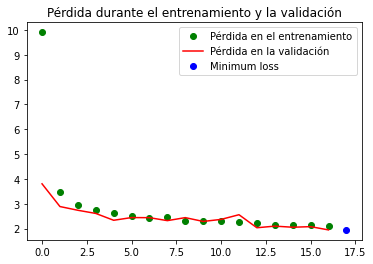

In [33]:
import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(loss))

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

**NOTA: Una vez que tu modelo sea validado, es OBLIGATORIO realizar una evaluación final del modelo validado, pero ahora, con el conjunto de prueba, el cual no se mezcló en absoluto ni con el conjunto de entrenamiento ni con el de validación. Si el rendimiento de tu modelo en el conjunto de prueba es adecuado, es hasta ese punto en el que podemos establecer que el modelo está listo para ser desplegado en entornos más retadores donde tiene que hacer predicciones, como en un ambiente de producción.**

# **Re-entrenamiento y evaluación del modelo final**

Una vez que se seleccionó el modelo tomando como base su rendimiento en la validación, una práctica recomendada es volver a entrenar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamieto original.

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #MSE = Mean Square Error / MAE = Mean Absolute Error

In [36]:
# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(train_data_std, train_targets,
          epochs=18, batch_size=1, verbose=0)
# Evaluamos el modelo final
test_mse_score, test_mae_score = model.evaluate(test_data_std, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.6829 - mae: 2.6543


In [37]:
test_mae_score

2.654324769973755

In [38]:
test_data_std.shape

(102, 13)

In [39]:
model.predict(test_data_std)

array([[10.079743 ],
       [18.700485 ],
       [22.012568 ],
       [33.888752 ],
       [24.38297  ],
       [21.464275 ],
       [27.252504 ],
       [21.569494 ],
       [18.996733 ],
       [21.699804 ],
       [21.38865  ],
       [17.141617 ],
       [15.772684 ],
       [41.718105 ],
       [19.809122 ],
       [20.072504 ],
       [24.82901  ],
       [19.426548 ],
       [20.114073 ],
       [27.134409 ],
       [12.396744 ],
       [15.708008 ],
       [21.934404 ],
       [17.050755 ],
       [19.78829  ],
       [22.804832 ],
       [28.07866  ],
       [29.939283 ],
       [13.343352 ],
       [19.188528 ],
       [19.610048 ],
       [17.102137 ],
       [31.968346 ],
       [23.444597 ],
       [18.020123 ],
       [ 8.842878 ],
       [17.05778  ],
       [17.90383  ],
       [19.157137 ],
       [25.559792 ],
       [30.013487 ],
       [27.433668 ],
       [15.024572 ],
       [40.83235  ],
       [26.4513   ],
       [25.65546  ],
       [27.37074  ],
       [18.90

In [40]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [41]:
test_predictions = model.predict(test_data_std)

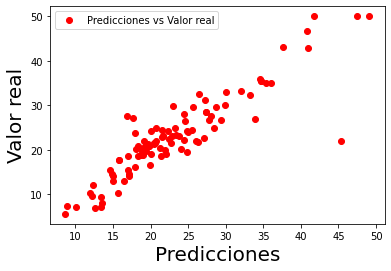

In [42]:
import matplotlib.pyplot as plt
plt.plot(test_predictions, test_targets, 'ro', label='Predicciones vs Valor real')
plt.xlabel('Predicciones', fontsize= 20)
plt.ylabel('Valor real', fontsize= 20)
plt.legend()

plt.show()

NOTA: La información presentada en este notebook, fue tomada de https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb, La única variación sutil del presente notebook con respecto a la fuente original, tiene que ver con la descripción de ciertas partes del código.